In [182]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [183]:
import sys
import pickle
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# LinearRegression from sklearn.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error

In [ ]:
FILE_PATH = "/content/drive/MyDrive/Summative/"
sys.path.append(FILE_PATH)

In [185]:
# Load and remove duplicates
path = "/content/drive/MyDrive/Summative/world_bank_development_indicators.csv"
adv = pd.read_csv(path).drop_duplicates()

# Filter positive GDP and create derived columns
df = adv[adv['GDP_current_US']>0].copy()
df.loc[:, 'log10_GDP_per_cap'] = np.log10(df['GDP_current_US']/df['population'])
df.loc[:, 'year'] = df['date'].apply(lambda x: int(str(x)[:4]))

# Drop unused columns
df = df.drop(['date', 'GDP_current_US'], axis=1)

# Mission Statement
"Leveraging technology to reinforce the integrity of governmental institutions through data-driven insights and evidence-based policy recommendations"

## Data Connection
This dataset uniquely captures the multifaceted nature of institutional integrity through comprehensive governance indicators (corruption control, rule of law), economic metrics (GDP, trade), and social outcomes (education, health). This integration of data points enables us to quantify institutional effectiveness and identify key drivers of successful governance across diverse global contexts.

# World Development Indicators Dataset (1960-2022)

## Source
[World Bank Development Indicators Database](https://www.kaggle.com/datasets/nicolasgonzalezmunoz/world-bank-world-development-indicators/data?select=world_bank_development_indicators.csv)

## Background
This dataset contains macro-economical, social, political and environmental data extracted from the World Bank database. It covers 268 countries and regions from 1960 to 2022, including 48 original features (all numerical) plus 2 derived columns. Due to varying data collection and reporting across regions and time periods, there are missing entries across different columns.

## Dataset Structure
Structure:
- Format: CSV
- Rows: Country-year observations for 268 countries/regions  
- Columns: 50 indicators (48 original + 2 derived)
- Time Range: 1960-2022
- Geographic Coverage: Global

## Column Descriptions

### 1. Basic Identifiers
- **country** : str
    - Country or geographic region name

- **date** : datetime
    - Date of measurement (YYYY-MM-DD format)

### 2. Land & Environmental  
- **agricultural_land%** : float
    - Agricultural land as % of land area
- **forest_land%** : float
    - Forest area as % of land area
- **land_area** : float
    - Land area in square kilometers (km²)
- **avg_precipitation** : float
    - Average precipitation in depth (mm per year)
- **CO2_emisions** : float
    - CO2 emissions (kt)
- **other_greenhouse_emisions** : float
    - Total greenhouse gas emissions (kt of CO2 equivalent)

### 3. Economic
- **GDP_current_US** : float
    - GDP in current US dollars
- **trade_in_services%** : float
    - Trade in services as % of GDP
- **inflation_annual%** : float
    - Inflation, consumer prices (annual %)
- **real_interest_rate** : float
    - Real interest rate (%)
- **risk_premium_on_lending** : float
    - Risk premium on lending (lending rate minus treasury bill rate, %)
- **central_goverment_debt%** : float
    - Central government debt, total (% of GDP)
- **tax_revenue%** : float
    - Tax revenue (% of GDP)
- **expense%** : float
    - Expense (% of GDP)
- **research_and_development_expenditure%** : float
    - Research and development expenditure (% of GDP)

### 4. Governance & Institutional Quality
- **control_of_corruption_estimate** : float
    - Estimate of control of corruption
- **control_of_corruption_std** : float
    - Standard error of control of corruption estimate
- **goverment_effectiveness_estimate** : float
    - Estimate of Government Effectiveness
- **goverment_effectiveness_std** : float
    - Standard error of Government Effectiveness estimate
- **political_stability_estimate** : float
    - Estimate of Political Stability and Absence of Violence/Terrorism
- **political_stability_std** : float
    - Standard error of Political Stability estimate
- **rule_of_law_estimate** : float
    - Estimate of Rule of Law
- **rule_of_law_std** : float
    - Standard error of Rule of Law estimate
- **regulatory_quality_estimate** : float
    - Estimate of Regulatory Quality
- **regulatory_quality_std** : float
    - Standard error of Regulatory Quality estimate
- **voice_and_accountability_estimate** : float
    - Estimate of Voice and Accountability
- **voice_and_accountability_std** : float
    - Standard error of Voice and Accountability estimate

### 5. Development & Infrastructure
- **access_to_electricity%** : float
    - Access to electricity (% of population)
- **renewvable_energy_consumption%** : float
    - Renewable energy consumption (% of total final energy consumption)
- **electric_power_consumption** : float
    - Electric power consumption (kWh per capita)
- **individuals_using_internet%** : float
    - Individuals using the Internet (% of population)
- **logistic_performance_index** : float
    - Logistics performance index: Overall (1=low to 5=high)
- **doing_business** : float
    - Ease of doing business score (0=lowest to 100=best performance)
- **time_to_get_operation_license** : float
    - Days required to obtain operating license
- **statistical_performance_indicators** : float
    - Statistical performance indicators (SPI): Overall score (0-100)
- **human_capital_index** : float
    - Human Capital Index (HCI) (scale 0-1)

### 6. Social & Demographic
- **population** : float
    - Total population count
- **population_density** : float
    - Population density (people per km² of land area)
- **rural_population** : float
    - Rural population count
- **birth_rate** : float
    - Birth rate, crude (per 1,000 people)
- **death_rate** : float
    - Death rate, crude (per 1,000 people)
- **life_expectancy_at_birth** : float
    - Life expectancy at birth, total (years)
- **gini_index** : float
    - Gini index (measure of income inequality)
- **multidimensional_poverty_headcount_ratio%** : float
    - Multidimensional poverty headcount ratio (% of total population)
- **intentional_homicides** : float
    - Intentional homicides (per 100,000 people)

### 7. Government Expenditure
- **military_expenditure%** : float
    - Military expenditure (% of GDP)
- **government_expenditure_on_education%** : float
    - Government expenditure on education (% of GDP)
- **government_health_expenditure%** : float
    - Domestic general government health expenditure (% of GDP)

### Derived Columns
- **log10_GDP_per_cap** : float
    - Log10 transformation of GDP per capita (GDP_current_US/population)
- **year** : int
    - Extracted year from date column

In [186]:
# 1. Analyze missing values
print("Missing values in each column:")
print(df.isnull().sum())

# 2. Choose single imputation method per column based on data type
# Time series columns
time_series_cols = ['log10_GDP_per_cap', 'life_expectancy_at_birth']
df[time_series_cols] = df[time_series_cols].interpolate()

# Categorical/fixed columns
df = df.dropna(subset=['country'])  # Critical identifier

# Remaining numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

Missing values in each column:
country                                         0
agricultural_land                             652
forest_land                                  5389
land_area                                     534
avg_precipitation                            4398
trade_in_services                            4088
control_of_corruption_estimate               8522
control_of_corruption_std                    8522
access_to_electricity                        6233
renewvable_energy_consumption                5512
electric_power_consumption                   6084
CO2_emisions                                 6022
other_greenhouse_emisions                    6022
population_density                            534
inflation_annual                             2919
real_interest_rate                           8791
risk_premium_on_lending                     10854
research_and_development_expenditure        10309
central_goverment_debt                      11119
tax_revenue        

In [187]:
df.shape

(13198, 50)

# Visualization: GDP vs Life Expectancy Relationship

This visualization examines the relationship between economic development and life expectancy across different countries and time periods, using the World Bank Development Indicators dataset.

## Purpose:
- Examines correlation between economic development and life expectancy
- Uses log-transformed GDP to handle large value ranges
- Shows potential clustering of countries/regions



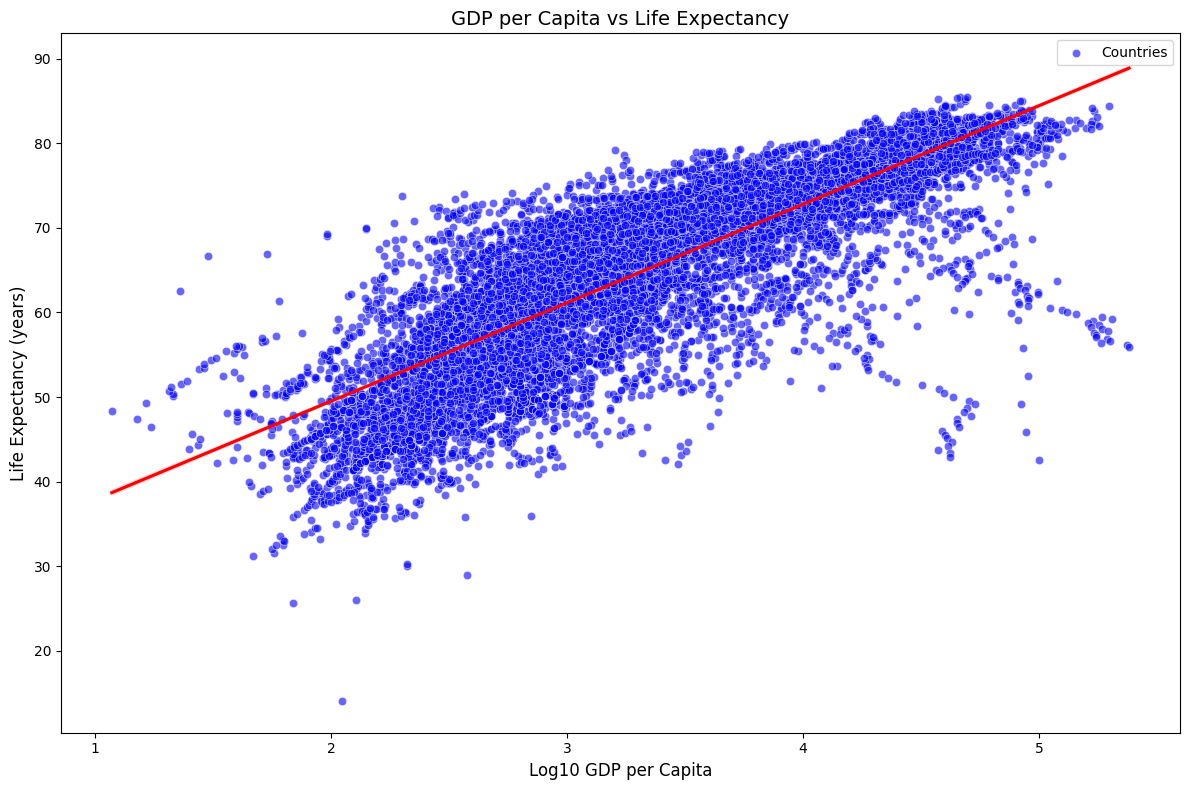

In [188]:
# Scatter plot with trend line
plt.figure(figsize=(12, 8))

# Main scatter plot
sns.scatterplot(data=df,
               x='log10_GDP_per_cap',
               y='life_expectancy_at_birth',
               alpha=0.6,
               color='blue',
               label='Countries')

# Add trend line with confidence interval
sns.regplot(data=df,
           x='log10_GDP_per_cap',
           y='life_expectancy_at_birth',
           scatter=False,
           color='red',
           label='Trend')

plt.title('GDP per Capita vs Life Expectancy', fontsize=14)
plt.xlabel('Log10 GDP per Capita', fontsize=12)
plt.ylabel('Life Expectancy (years)', fontsize=12)

plt.tight_layout()
plt.show()

In [189]:
# Removes categorical data
countries = df['country']
df_with_no_country = df.drop(['country'], axis=1)

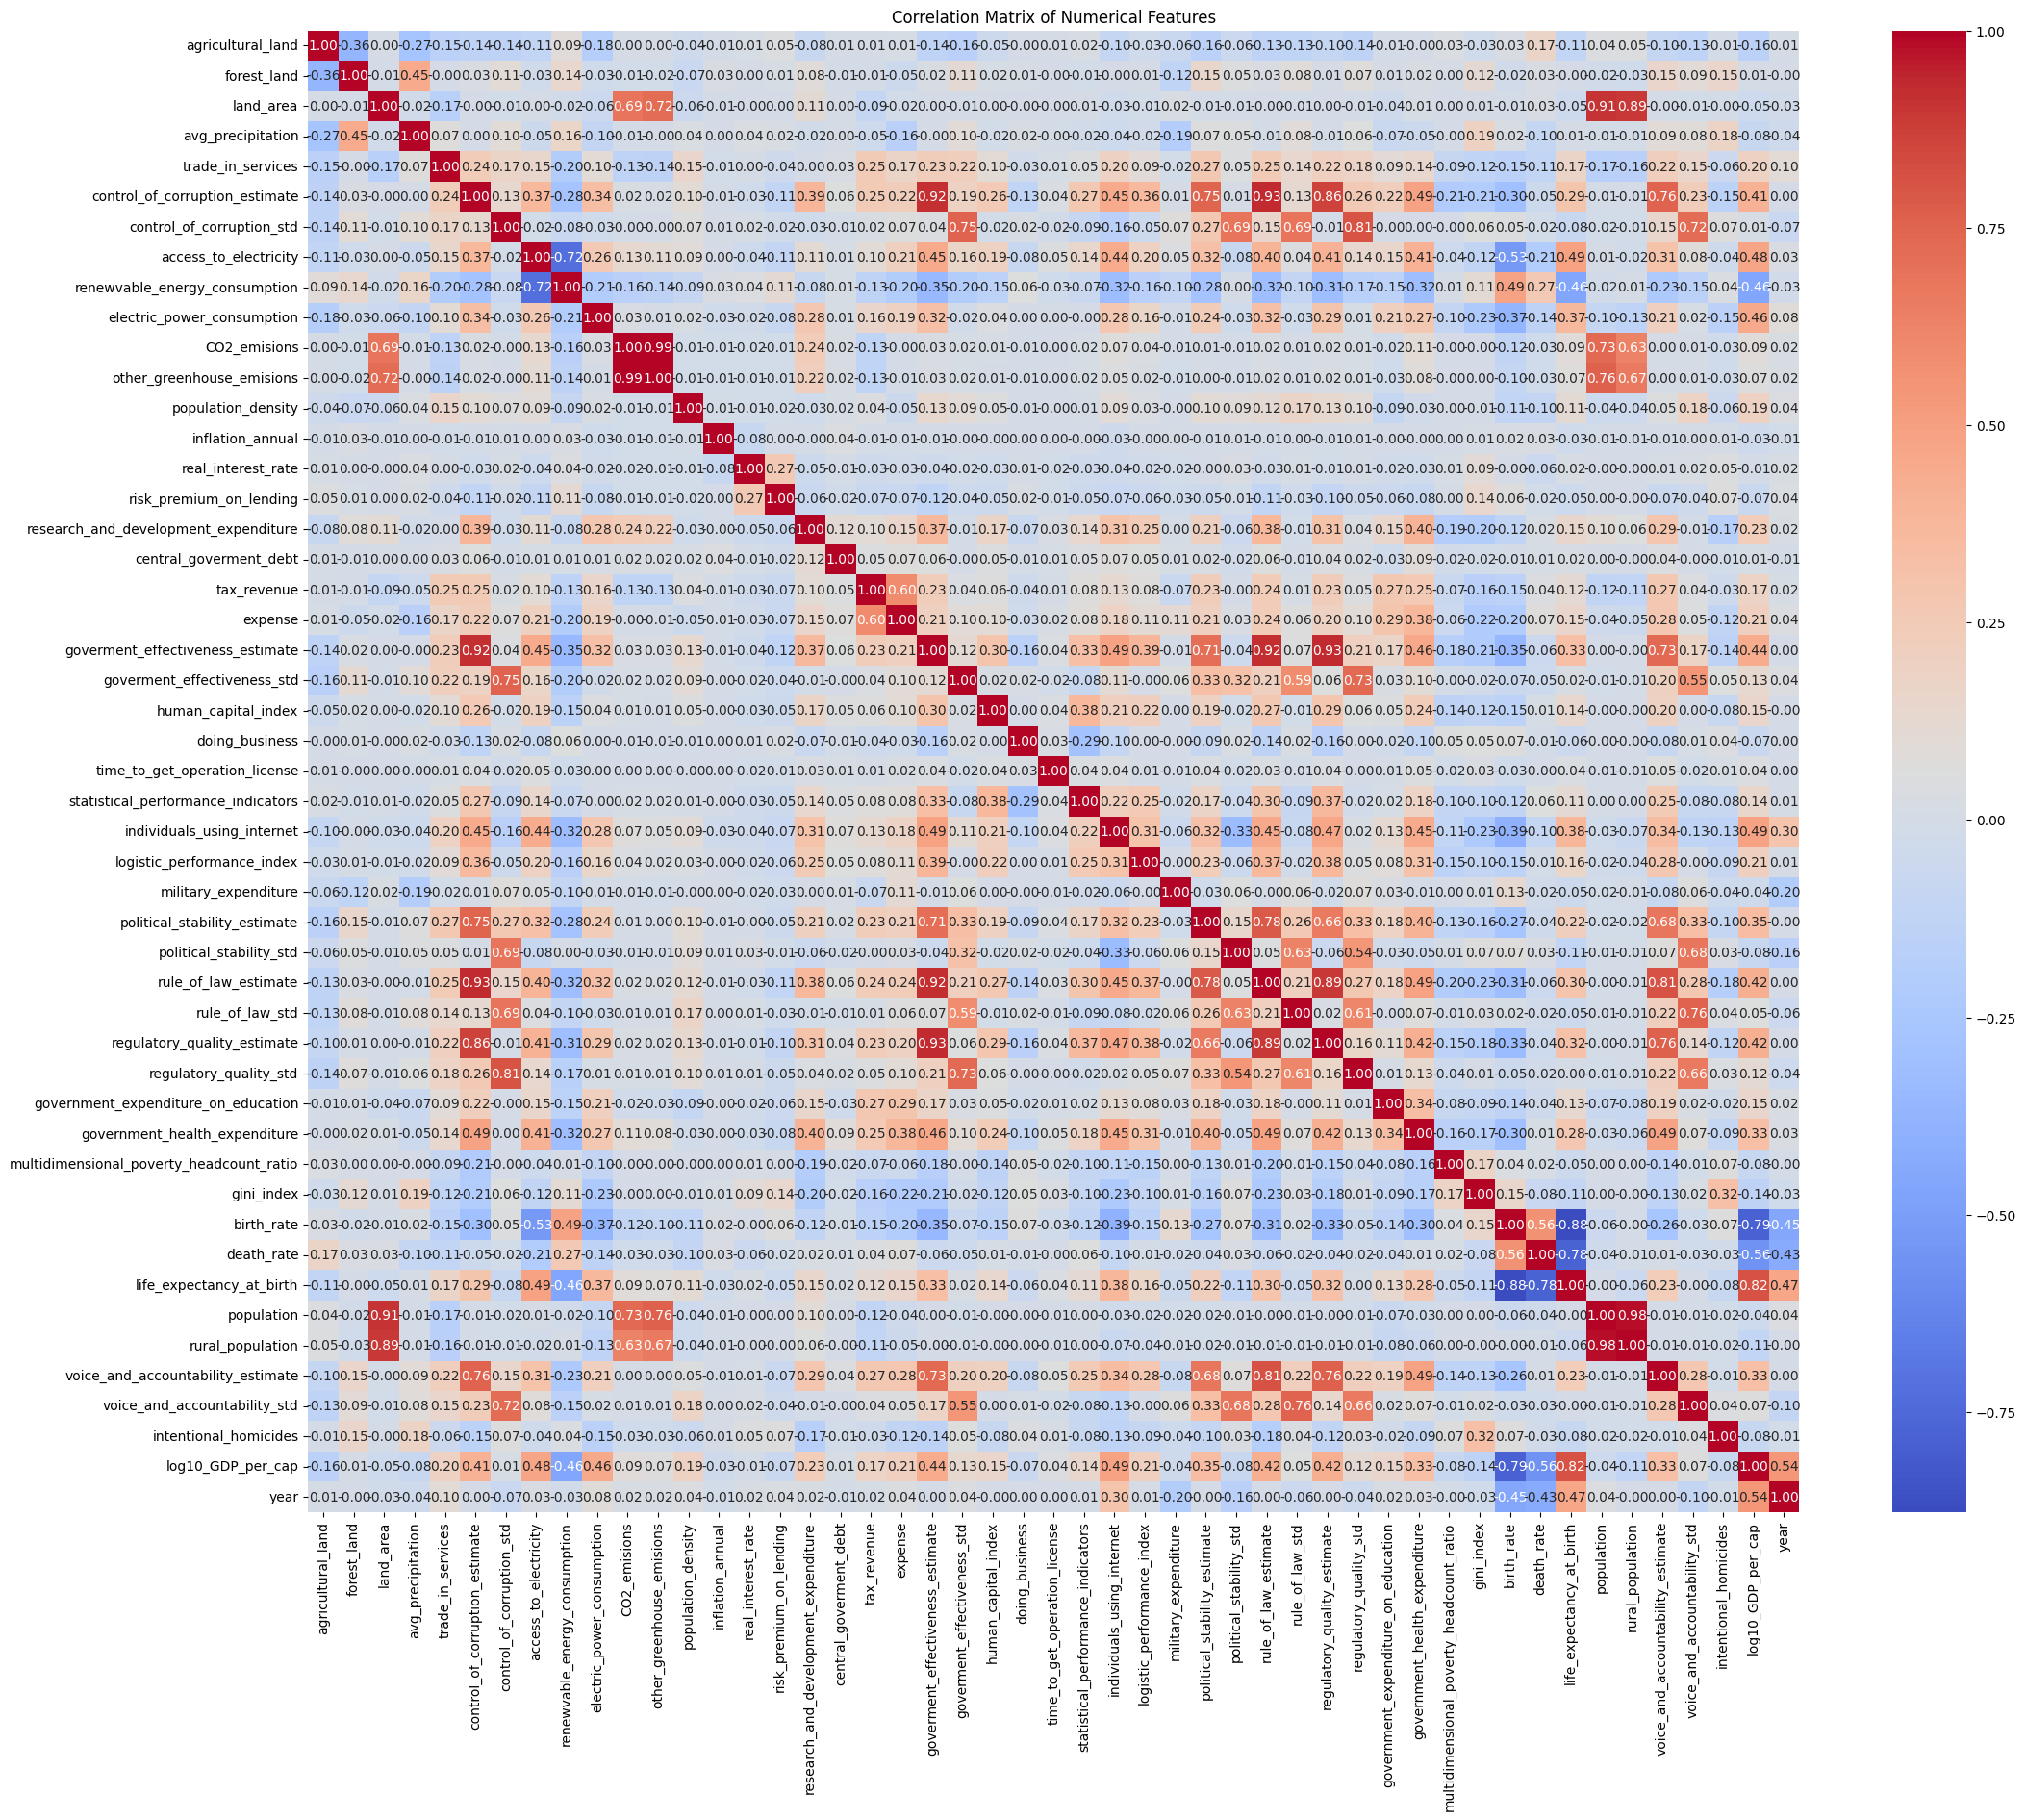

In [190]:
# Create correlation matrix
correlation_matrix = df_with_no_country.corr()

plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Limiting correlation of Features

In [191]:
# Set correlation threshold and get correlation matrix
correlation_limit = 0.5
corr_matrix = df_with_no_country.corr()

# Find columns to drop
columns_to_drop = set()
for i in range(len(corr_matrix.columns)):
   for j in range(i):
       if abs(corr_matrix.iloc[i, j]) > correlation_limit:
           col_i = corr_matrix.columns[i]
           if col_i != 'log10_GDP_per_cap':
            columns_to_drop.add(col_i)

# Drop correlated columns from train and test
df_cleaned = df_with_no_country.drop(columns=columns_to_drop)

print(f"Removed {len(columns_to_drop)} features")
print(f"Features remaining: {df_cleaned.shape[1]}")
columns_to_drop

Removed 20 features
Features remaining: 29


{'CO2_emisions',
 'birth_rate',
 'death_rate',
 'expense',
 'goverment_effectiveness_estimate',
 'goverment_effectiveness_std',
 'life_expectancy_at_birth',
 'other_greenhouse_emisions',
 'political_stability_estimate',
 'political_stability_std',
 'population',
 'regulatory_quality_estimate',
 'regulatory_quality_std',
 'renewvable_energy_consumption',
 'rule_of_law_estimate',
 'rule_of_law_std',
 'rural_population',
 'voice_and_accountability_estimate',
 'voice_and_accountability_std',
 'year'}

# Visualization of Remaining Features

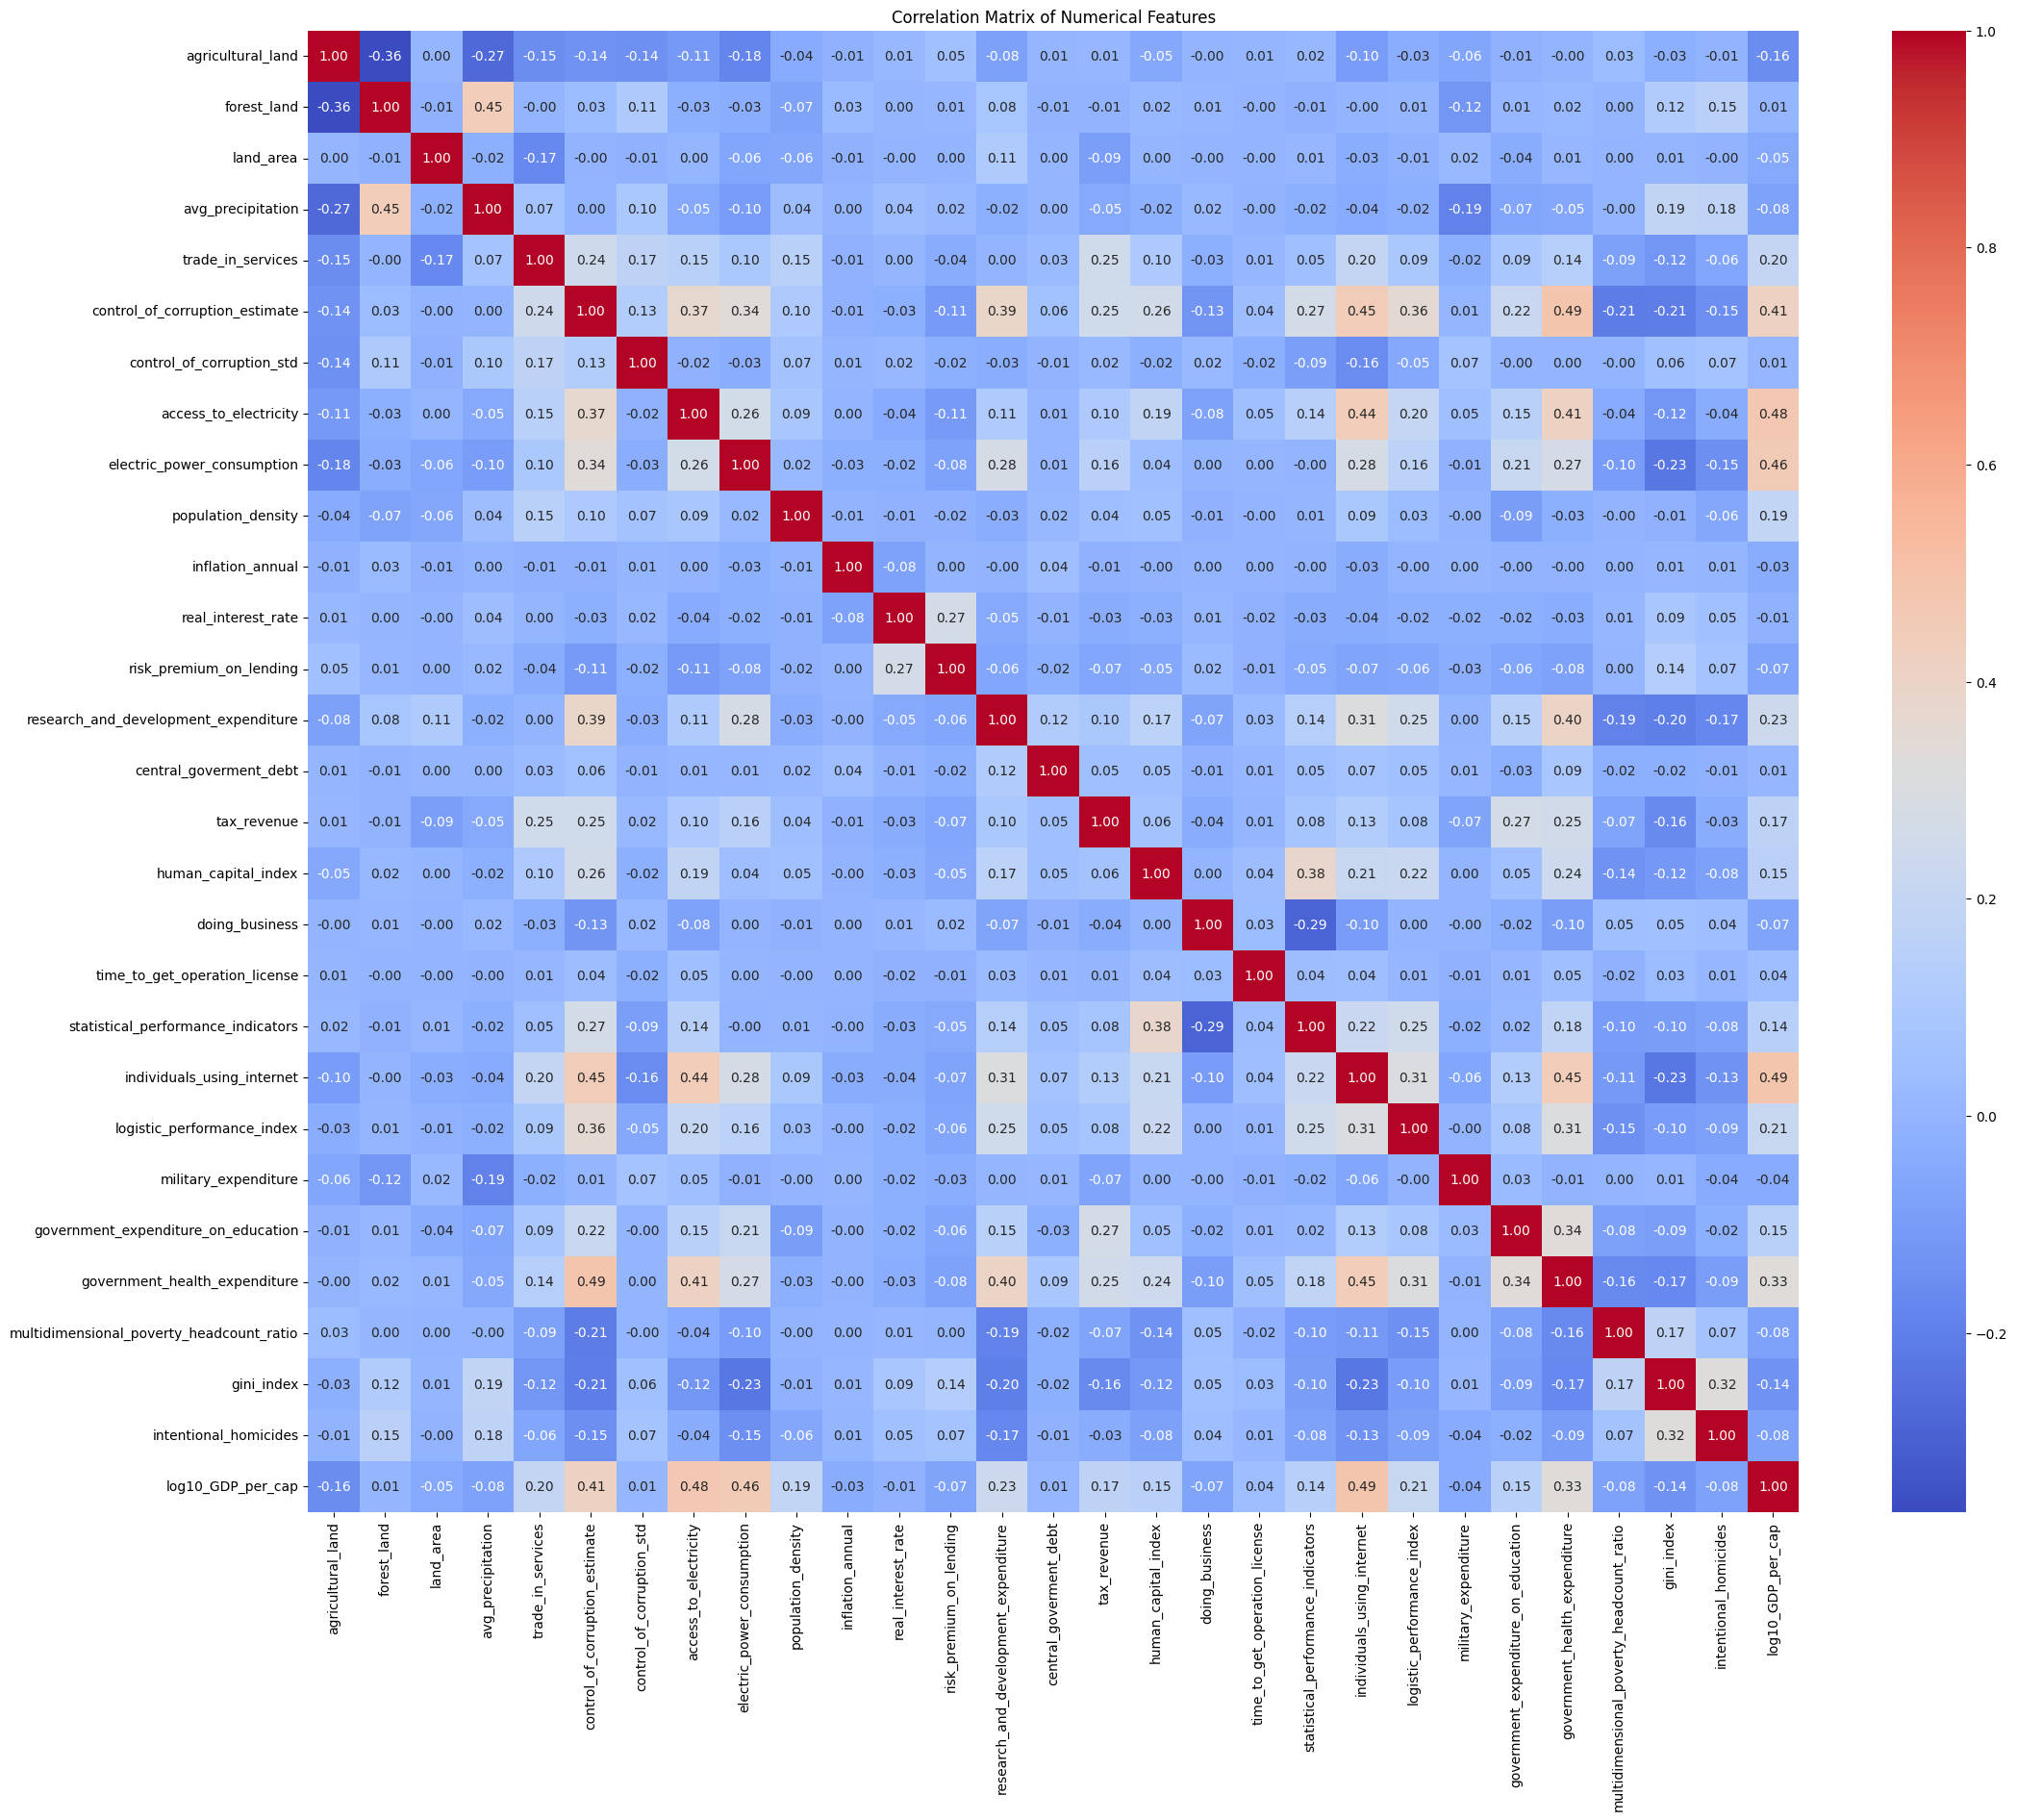

In [192]:
# Create correlation matrix
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# One Hot encoding categorical features

In [193]:
# One hot encode categorical columns (country)
df_cleaned['country'] = countries
encoded_df = pd.get_dummies(df_cleaned,
                           columns=['country'],
                           prefix=['country'])
print(f"Shape of encoded data: {encoded_df.shape}")
print(f"Number of features after encoding: {encoded_df.shape[1]}")

Shape of encoded data: (13198, 291)
Number of features after encoding: 291


In [194]:
y = encoded_df['log10_GDP_per_cap']
if 'log10_GDP_per_cap' in encoded_df.columns:
    encoded_df = encoded_df.drop(['log10_GDP_per_cap'], axis=1)
X = encoded_df

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=42)
y_test.shape

(1320,)

In [196]:
#Print out the rank of models From the best to the worst performing and associated RSMEs


# Create models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)


# Train
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Predictions
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

# RMSE
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))

# Visualize linear regression fit

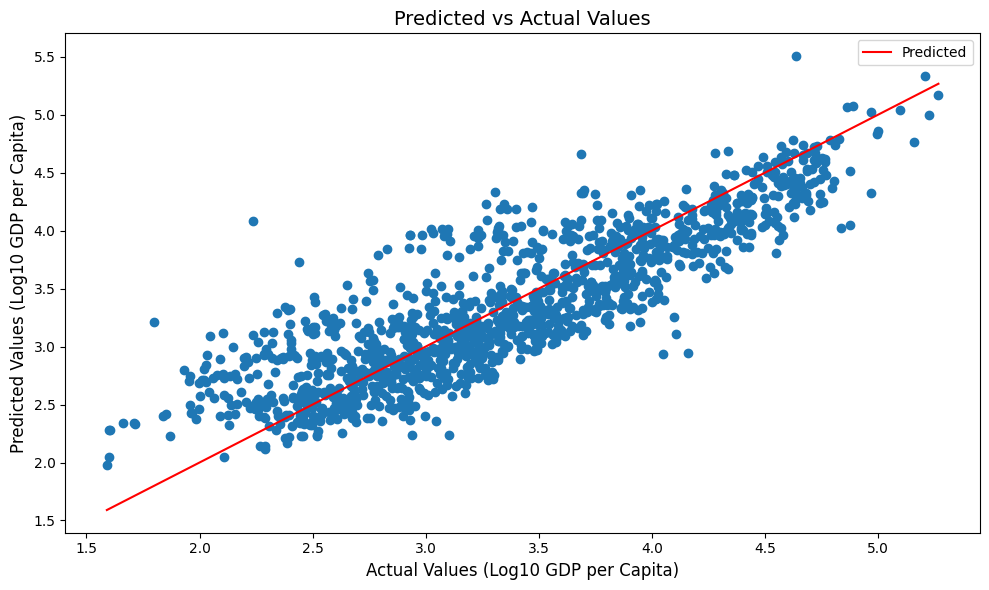

In [197]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Predicted')
plt.title('Predicted vs Actual Values', fontsize=14)
plt.xlabel('Actual Values (Log10 GDP per Capita)', fontsize=12)
plt.ylabel('Predicted Values (Log10 GDP per Capita)', fontsize=12)
plt.tight_layout()
plt.legend()
plt.show()

In [198]:
model_rank = {
    'Linear Regression': {
        'RMSE': lr_rmse,
        'Model': lr_model
    },
    'Random Forest': {
        'RMSE': rf_rmse,
        'Model': rf_model
    },
    'Decision Tree': {
        'RMSE': dt_rmse,
        'Model': dt_model
    }
}

print("Model Rank:")
for model_name, metrics in model_rank.items():
    print(f"{model_name}: RMSE = {metrics['RMSE']}")

Model Rank:
Linear Regression: RMSE = 0.3692664712505581
Random Forest: RMSE = 0.12372456933790114
Decision Tree: RMSE = 0.17046788438549132


In [199]:
# Pickles models to use on the Fast API
def save_model(model, model_name, rmse):
    # Save the model
    os.makedirs("models/", exist_ok=True)
    model_path = sys.path[0] + f"/models/{model_name}.pkl"
    with open(model_path, 'wb') as f:
        pickle.dump({
            'model': model,
            'rmse': rmse
        }, f)
    print(f"Saved {model_name} to {model_path}")

# Sorts models
sorted_models = sorted(model_rank.items(), key=lambda x: x[1]['RMSE'])

# Get the best model name and its RMSE score
best_model_name, best_model_rmse = sorted_models[0]

# Save the best model
save_model(model_rank[best_model_name]['Model'], 'Best Model', best_model_rmse)

Saved Best Model to /content/models/Best Model.pkl


In [200]:
# Make prediction with best model
test_data = X_test.iloc[[0]]
pred = model_rank[best_model_name]['Model'].predict(test_data)
print(f"Predicted log10 GDP per capita: {pred[0]}")

Predicted log10 GDP per capita: 2.0441666238086498
